# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import csv
import tensorflow as tf

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len (X_test)

# What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(pd.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


#### Lookup function for the name of the traffic sign

In [3]:
def lookup_name_traffic_sign(num, max_classes=n_classes):
    signnames_dict={}

    with open('signnames.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            signnames_dict[int(row['ClassId'])] = row['SignName']
    
    if num not in signnames_dict:
        return 'ERROR'
    else:
        return signnames_dict[num]

#### Extract an image at random to control the labels

Speed limit (100km/h)


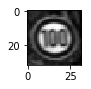

In [4]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
print(lookup_name_traffic_sign(y_train[index]))

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

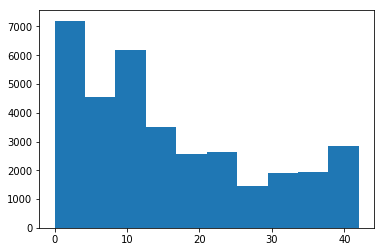

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train)
plt.show()

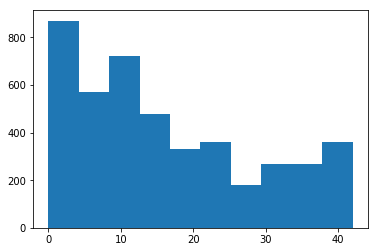

In [6]:
plt.hist(y_valid)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print (X_train.shape)
print (len(X_train))
print (type(X_train))

def local_histo_equalize(image):
    
    #Apply equalization locally to grayscale images.
    #Input: A grayscale image.
    kernel = morp.disk(30)
    img_local = rank.equalize(image, selem=kernel)
    return img_local

def equalize(image):
    return cv2.equalizeHist(image)

def preprocess_set(x_set):
    #Grayscale
    x_set = np.sum(x_set/3, axis=3, keepdims=True)
    
    #Normalization
    x_set = (x_set-128)/128
    
    return x_set


print (X_train.shape)
print (len(X_train))
print (type(X_train))

print (X_test.shape)
print (len(X_test))
print (type(X_test))

print (X_valid.shape)
print (len(X_valid))
print (type(X_valid))


(34799, 32, 32, 3)
34799
<class 'numpy.ndarray'>
(34799, 32, 32, 3)
34799
<class 'numpy.ndarray'>
(12630, 32, 32, 3)
12630
<class 'numpy.ndarray'>
(4410, 32, 32, 3)
4410
<class 'numpy.ndarray'>


### Model Architecture

In [8]:
### HyperParameters

In [9]:
dropout = 0.75

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
import tensorflow.contrib.layers as layers

from tensorflow.contrib.layers import flatten
import cv2

def Inception(inputs, conv11_size, conv33_11_size, conv33_size,conv55_11_size, conv55_size, pool11_size):
    conv11 = layers.conv2d(inputs, conv11_size, [1, 1])
    conv33_reduce = layers.conv2d(inputs, conv33_11_size, [1, 1])
    conv33 = layers.conv2d(conv33_reduce, conv33_size, [3, 3])
    conv55_reduce = layers.conv2d(inputs, conv55_11_size, [1, 1])
    conv55 = layers.conv2d(conv55_reduce, conv55_size, [5, 5])
    pool_proj = layers.max_pool2d(inputs, [3, 3], stride = 1, padding='SAME')
    pool11 = layers.conv2d(pool_proj, pool11_size, [1, 1])
    return tf.concat([conv11, conv33, conv55, pool11], 3)

def SimpleGooLeNet(inputs, dropout_keep_prob): # inputs size:32x32x3
    conv1 = layers.conv2d(inputs, 64, [3, 3], stride = 2) # 16x16x64
    
    inception_1 = Inception(conv1, 64, 96, 128, 16, 32, 32) # 16x16x256
    inception_2 = Inception(inception_1, 128, 128, 192, 32, 96, 64) # 16x16x480
    
    pool1 = layers.max_pool2d(inception_2, [2, 2]) # 8 x 8 x 480
    pool2 = layers.max_pool2d(pool1, [2, 2]) # 4 x 4 x 480

    reshape = tf.reshape(pool2, [-1, 7680])
    dropout = layers.dropout(reshape, dropout_keep_prob)
    logits = layers.fully_connected(dropout, 43, activation_fn=None)
    
    return logits

def GoogLeNet(inputs, dropout_keep_prob): # inputs size:32x32x3
    conv1 = layers.conv2d(inputs, 64, [3, 3], stride = 2) # 16x16x64
    
    inception_2a = Inception(conv1, 64, 96, 128, 16, 32, 32) # 16x16x256
    inception_2b = Inception(inception_2a, 128, 128, 192, 32, 96, 64) # 16x16x480
    pool2 = layers.max_pool2d(inception_2b, [3, 3]) # 7x7x480 ? why
    
    inception_3a = Inception(pool2, 192, 96, 208, 16, 48, 64) # 7x7x512
    inception_3b = Inception(inception_3a, 160, 112, 224, 24, 64, 64) # 7x7x512
    pool3 = layers.max_pool2d(inception_3b, [3, 3]) # 3x3x512
    
    inception_4a = Inception(pool3, 256, 160, 320, 32, 128, 128) # 3x3x832
    inception_4b = Inception(inception_4a, 384, 192, 384, 48, 128, 128) # 3x3x1024
    pool4 = layers.avg_pool2d(inception_4b, [3, 3], stride = 1) 

    reshape = tf.reshape(pool4, [-1, 1024])
    dropout = layers.dropout(reshape, dropout_keep_prob)
    logits = layers.fully_connected(dropout, 43, activation_fn=None)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Placeholder
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder_with_default(1.0, shape=())

# Hyperparameters
LEARNING_RATE = 4e-4
EPOCHS = 10
BATCH_SIZE = 128

# Train method
#logits = GoogLeNet(x, keep_prob)
logits = SimpleGooLeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_op = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
train_op = optimizer.minimize(loss_op)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#%%time
saver = tf.train.Saver()
train_accuracy = []
valid_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        total_train_acc = 0
        print("EPOCH {} :".format(i+1), end=' ')
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, train_acc = sess.run([train_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            total_train_acc += (train_acc * len(batch_x))
        train_accuracy.append(total_train_acc / num_examples)
        valid_acc = evaluate(X_valid, y_valid)
        valid_accuracy.append(valid_acc)
        print("Validation Accuracy = {:.3f}".format(valid_acc))
        
    saver.save(sess, './model/googlenet.ckpt')
    print("Model saved")

Training...
EPOCH 1 : Validation Accuracy = 0.705
EPOCH 2 : Validation Accuracy = 0.872
EPOCH 3 : Validation Accuracy = 0.912
EPOCH 4 : Validation Accuracy = 0.927
EPOCH 5 : Validation Accuracy = 0.953
EPOCH 6 : Validation Accuracy = 0.940
EPOCH 7 : Validation Accuracy = 0.955
EPOCH 8 : Validation Accuracy = 0.965
EPOCH 9 : Validation Accuracy = 0.944
EPOCH 10 : Validation Accuracy = 0.960
Model saved
